In [ ]:
# Cell 1: imports + load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

DATA_PATH = 'amazon.csv'   # change path if needed
df = pd.read_csv(DATA_PATH)

print("Loaded dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())


Loaded dataset shape: (406, 34)
Columns: ['a-link-normal href', 's-image src', 'puis-label-popover href', 'a-color-secondary', 'a-color-base', 'puis', 'a-link-normal href 2', 'a-link-normal', 'a-size-base-plus', 'a-link-normal href 3', 'a-size-base-plus 2', 'aok-offscreen', 'a-link-normal href 4', 'a-offscreen', 'a-price-symbol', 'a-price-whole', 'a-offscreen 2', 'a-size-base', 'a-offscreen 3', 'a-price', 'a-row', 'a-truncate-full', 'a-truncate-cut', 'a-column', 'a-text-bold', 'a-size-base 2', 'a-button-text', 'a-size-small', 'a-popover-trigger href', 'a-icon-alt', 'a-size-mini', 'a-link-normal href 5', 'a-column 2', 'a-text-bold 2']


,a-link-normal href,s-image src,puis-label-popover href,a-color-secondary,a-color-base,puis,a-link-normal href 2,a-link-normal,a-size-base-plus,a-link-normal href 3,...,a-text-bold,a-size-base 2,a-button-text,a-size-small,a-popover-trigger href,a-icon-alt,a-size-mini,a-link-normal href 5,a-column 2,a-text-bold 2
0,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,https://m.media-amazon.com/images/I/71IZhvtamN...,javascript:void(0),Sponsored,Sponsored,You are seeing this ad based on the product’s ...,https://www.amazon.in/s?k=watches&crid=TINIRM4...,Let us know,GUESS,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,...,"Sun, 7 Dec",Only 1 left in stock.,Add to cart,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,https://m.media-amazon.com/images/I/61-vRq2ulO...,javascript:void(0),Sponsored,Sponsored,You are seeing this ad based on the product’s ...,https://www.amazon.in/s?k=watches&crid=TINIRM4...,Let us know,Noise,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,...,"Thu, 4 Dec",M.R.P:,Add to cart,4.0,javascript:void(0),4.0 out of 5 stars,(48.9K),https://www.amazon.in/deals,Or fastest delivery,"Tomorrow, 3 Dec"
2,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,https://m.media-amazon.com/images/I/61Gc2c+TuC...,javascript:void(0),Sponsored,Sponsored,You are seeing this ad based on the product’s ...,https://www.amazon.in/s?k=watches&crid=TINIRM4...,Let us know,Noise,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,...,"Thu, 4 Dec",M.R.P:,Add to cart,3.9,javascript:void(0),3.9 out of 5 stars,(24.5K),https://www.amazon.in/deals,Or fastest delivery,"Tomorrow, 3 Dec"
3,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,https://m.media-amazon.com/images/I/61r0qYy7jZ...,javascript:void(0),Sponsored,Sponsored,You are seeing this ad based on the product’s ...,https://www.amazon.in/s?k=watches&crid=TINIRM4...,Let us know,Noise,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,...,"Thu, 4 Dec",M.R.P:,Add to cart,4.1,javascript:void(0),4.1 out of 5 stars,(7.1K),https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Or fastest delivery,"Tomorrow, 3 Dec"
4,https://www.amazon.in/Matrix-Arabian-Polycarbo...,https://m.media-amazon.com/images/I/61xokB2JV4...,NaN,NaN,NaN,NaN,https://www.amazon.in/Matrix-Arabian-Polycarbo...,NaN,Matrix,https://www.amazon.in/Matrix-Arabian-Polycarbo...,...,"Thu, 4 Dec",M.R.P:,Add to cart,3.4,javascript:void(0),3.4 out of 5 stars,(87),NaN,Or fastest delivery,"Tomorrow, 3 Dec"


In [ ]:
# Cell 2: dtypes, missing counts, duplicates
print("=== dtypes ===")
print(df.dtypes)

print("\n=== Missing values (count & fraction) ===")
missing_counts = df.isna().sum()
missing_frac = (missing_counts / len(df)).round(4)
missing_summary = pd.DataFrame({'missing_count': missing_counts, 'missing_frac': missing_frac}).sort_values('missing_count', ascending=False)
display(missing_summary)

print("\n=== Duplicate rows (exact) ===")
print("Total duplicates:", df.duplicated().sum())

# Show sample unique values for object columns (helpful to inspect)
for c in df.select_dtypes(include='object').columns:
    print(f"\nColumn '{c}' sample unique values (up to 8):")
    print(df[c].dropna().unique()[:8])


=== dtypes ===
a-link-normal href         object
s-image src                object
puis-label-popover href    object
a-color-secondary          object
a-color-base               object
puis                       object
a-link-normal href 2       object
a-link-normal              object
a-size-base-plus           object
a-link-normal href 3       object
a-size-base-plus 2         object
aok-offscreen              object
a-link-normal href 4       object
a-offscreen                object
a-price-symbol             object
a-price-whole              object
a-offscreen 2              object
a-size-base                object
a-offscreen 3              object
a-price                    object
a-row                      object
a-truncate-full            object
a-truncate-cut             object
a-column                   object
a-text-bold                object
a-size-base 2              object
a-button-text              object
a-size-small               object
a-popover-trigger href     object

,missing_count,missing_frac
a-color-secondary,322,0.7931
puis-label-popover href,322,0.7931
puis,322,0.7931
a-link-normal,317,0.7808
a-color-base,302,0.7438
a-link-normal href 5,287,0.7069
a-size-base 2,178,0.4384
a-row,129,0.3177
a-price,114,0.2808
a-offscreen 2,114,0.2808



=== Duplicate rows (exact) ===
Total duplicates: 6

Column 'a-link-normal href' sample unique values (up to 8):
['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0ODEyMjExODg3NzMxNDY4OjE3NjQ2NDc2Njk6c3BfYXRmOjMwMDUyNzU2Nzc4ODczMjo6MDo6&url=%2FGUESS-Black-Stainless-Analog-Watch-U1362G3M%2Fdp%2FB0BWVKBNSK%2Fref%3Dsr_1_1_sspa%3Fcrid%3DTINIRM4ADNOF%26dib%3DeyJ2IjoiMSJ9.x3sWPLFZgIJJUWLkDUxmJOUSUj2WGfG13BlO1aEsjT1JqkkOSNlt_sMe_OdpA0cflY4Wvm_FQzNsdxPfkfj4xBxP1E06n5bHn0Kk1FTTKDoQDugtBwwZcl6RqaF2FE6crsJJwK4Fz1GCHv5I1fUAOTBOINDNbW0O9QxqYgOkDGCKQQWYqmDhS8Cte6Gtcl6E3xWLoyeP-7aNQP7h2j_bwZ_2j5kb4lgLxh3eV2FHMo7im7pqzeYiU5Athxa9ftsjdV6ogKyH_qZB84_jwynP-yp0UN6xU1M-eZhp_dQDoso.bvdbve3g_Z-WyF5iLEa-5zh2ye8HJv9kKksjwKxsJiw%26dib_tag%3Dse%26keywords%3Dwatches%26qid%3D1764647669%26sprefix%3Dwatches%252Caps%252C266%26sr%3D8-1-spons%26aref%3DCy6lojYNh9%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1&aref=Cy6lojYNh9&sp_cr=ZAZ'
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0ODEyMjExODg3NzMxNDY4OjE3NjQ2NDc2Njk6

In [ ]:
# Cell 3: convert numeric-like strings to numeric where majority looks numeric after cleaning
df2 = df.copy()

# helper function to clean strings (remove currency symbols, commas, percent, text)
import re
def clean_numeric_like(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    # replace common thousand separators and currency symbols and percent signs
    s = re.sub(r'[,₹$€£]', '', s)
    # remove words like "out of 5", "stars", "ratings", "approx" etc
    s = re.sub(r'(?i)(out of\s*\d+|stars|star|ratings|approx|approx\.)', '', s)
    # remove anything except digits, minus, dot
    s = re.sub(r'[^0-9\.\-]', '', s)
    # if empty -> keep original as NaN marker
    return s if s != '' else np.nan

# Try conversion candidate by candidate
converted_cols = []
for col in df2.columns:
    if df2[col].dtype == 'object' or df2[col].dtype.name == 'string':
        cleaned = df2[col].apply(clean_numeric_like)
        # How many non-null numeric-looking after cleaning?
        non_null = cleaned.notna().sum()
        # Try convert to numeric
        conv = pd.to_numeric(cleaned, errors='coerce')
        numeric_nonnull = conv.notna().sum()
        # If a substantial fraction (>=60%) converts to numeric, accept conversion
        if numeric_nonnull / max(1, len(df2)) >= 0.60:
            df2[col] = conv
            converted_cols.append(col)

print("Columns converted to numeric (heuristic):", converted_cols)
print("\nNew dtypes after conversion attempt:")
print(df2.dtypes)


Columns converted to numeric (heuristic): ['a-offscreen', 'a-price-whole', 'a-size-base', 'a-offscreen 3', 'a-price', 'a-row', 'a-truncate-full', 'a-text-bold', 'a-size-small', 'a-popover-trigger href', 'a-icon-alt', 'a-size-mini', 'a-text-bold 2']

New dtypes after conversion attempt:
a-link-normal href          object
s-image src                 object
puis-label-popover href     object
a-color-secondary           object
a-color-base                object
puis                        object
a-link-normal href 2        object
a-link-normal               object
a-size-base-plus            object
a-link-normal href 3        object
a-size-base-plus 2          object
aok-offscreen               object
a-link-normal href 4        object
a-offscreen                float64
a-price-symbol              object
a-price-whole              float64
a-offscreen 2               object
a-size-base                float64
a-offscreen 3              float64
a-price                    float64
a-row        

In [ ]:
# Cell 4: drop exact duplicates
n_dup = df2.duplicated().sum()
print("Exact duplicates before:", n_dup)
if n_dup > 0:
    df2 = df2.drop_duplicates().reset_index(drop=True)
    print("Dropped duplicates. New shape:", df2.shape)
else:
    print("No exact duplicates found.")


Exact duplicates before: 7
Dropped duplicates. New shape: (399, 34)


In [ ]:
# Cell 5: missing handling strategy
threshold_drop = 0.40
miss_frac = df2.isna().sum() / len(df2)
cols_drop = miss_frac[miss_frac > threshold_drop].index.tolist()
print("Columns to drop (>40% missing):", cols_drop)
df2 = df2.drop(columns=cols_drop, errors='ignore')

# Impute numeric with median, categorical with mode or 'Unknown'
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df2.select_dtypes(include=['object','category','string']).columns.tolist()

for c in numeric_cols:
    if df2[c].isna().sum() > 0:
        med = df2[c].median()
        df2[c] = df2[c].fillna(med)
        print(f"Imputed numeric {c} with median = {med}")

for c in cat_cols:
    if df2[c].isna().sum() > 0:
        mode = df2[c].mode(dropna=True)
        replacement = mode[0] if not mode.empty else 'Unknown'
        df2[c] = df2[c].fillna(replacement)
        print(f"Imputed categorical {c} with '{replacement}'")

print("After imputation shape:", df2.shape)
display(pd.DataFrame(df2.isna().sum(), columns=['missing_count']).sort_values('missing_count', ascending=False))


Columns to drop (>40% missing): ['puis-label-popover href', 'a-color-secondary', 'a-color-base', 'puis', 'a-link-normal', 'a-size-base 2', 'a-link-normal href 5']
Imputed numeric a-offscreen with median = 2499.0
Imputed numeric a-price-whole with median = 2499.0
Imputed numeric a-size-base with median = 100.0
Imputed numeric a-offscreen 3 with median = 4999.0
Imputed numeric a-price with median = 4999.0
Imputed numeric a-row with median = 40.0
Imputed numeric a-truncate-full with median = 5.0
Imputed numeric a-text-bold with median = 4.0
Imputed numeric a-size-small with median = 4.2
Imputed numeric a-popover-trigger href with median = 0.0
Imputed numeric a-icon-alt with median = 4.2
Imputed numeric a-size-mini with median = 27.8
Imputed numeric a-text-bold 2 with median = 3.0
Imputed categorical a-link-normal href with 'https://www.amazon.in/s?k=watches&page=7&crid=TINIRM4ADNOF&qid=1764647721&sprefix=watches%2Caps%2C266&xpid=f9gjHoWjwkQ0I&ref=sr_pg_6#'
Imputed categorical s-image src 

,missing_count
a-link-normal href,0
s-image src,0
a-link-normal href 2,0
a-size-base-plus,0
a-link-normal href 3,0
a-size-base-plus 2,0
aok-offscreen,0
a-link-normal href 4,0
a-offscreen,0
a-price-symbol,0


In [ ]:
# Cell 6: descriptive stats for numeric and categorical summaries
print("Numeric description:")
display(df2.describe().transpose())

print("\nSkewness & kurtosis for numeric columns:")
for c in df2.select_dtypes(include=[np.number]).columns:
    print(f"{c}: mean={df2[c].mean():.3f}, median={df2[c].median():.3f}, std={df2[c].std():.3f}, skew={df2[c].skew():.3f}, kurtosis={df2[c].kurtosis():.3f}")

print("\nTop 10 value counts for categorical columns (first 3 shown):")
for c in df2.select_dtypes(include=['object','category','string']).columns[:3]:
    print(f"\nColumn: {c}")
    display(df2[c].value_counts().head(10))


Numeric description:


,count,mean,std,min,25%,50%,75%,max
a-offscreen,399.0,5806.615614,13927.289840,99.0,1324.0,2499.0,5442.0,157990.0
a-price-whole,399.0,5806.609023,13927.291757,99.0,1324.0,2499.0,5442.0,157990.0
a-size-base,399.0,159.724311,161.404885,1.0,100.0,100.0,200.0,900.0
a-offscreen 3,399.0,7312.729323,9880.895749,620.0,3649.5,4999.0,6999.0,99999.0
a-price,399.0,7337.791980,9880.066083,620.0,3700.0,4999.0,6999.0,99999.0
a-row,399.0,41.822055,22.441793,1.0,30.0,40.0,50.5,95.0
a-truncate-full,399.0,8.734336,55.580216,5.0,5.0,5.0,5.0,1000.0
a-text-bold,399.0,4.411028,1.244679,4.0,4.0,4.0,4.0,22.0
a-size-small,399.0,4.130075,0.337442,2.7,4.0,4.2,4.3,5.0
a-popover-trigger href,399.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0



Skewness & kurtosis for numeric columns:
a-offscreen: mean=5806.616, median=2499.000, std=13927.290, skew=7.699, kurtosis=70.634
a-price-whole: mean=5806.609, median=2499.000, std=13927.292, skew=7.699, kurtosis=70.634
a-size-base: mean=159.724, median=100.000, std=161.405, skew=2.087, kurtosis=4.647
a-offscreen 3: mean=7312.729, median=4999.000, std=9880.896, skew=6.143, kurtosis=48.642
a-price: mean=7337.792, median=4999.000, std=9880.066, skew=6.137, kurtosis=48.596
a-row: mean=41.822, median=40.000, std=22.442, skew=0.371, kurtosis=-0.284
a-truncate-full: mean=8.734, median=5.000, std=55.580, skew=16.069, kurtosis=270.619
a-text-bold: mean=4.411, median=4.000, std=1.245, skew=7.975, kurtosis=100.821
a-size-small: mean=4.130, median=4.200, std=0.337, skew=-0.882, kurtosis=2.974
a-popover-trigger href: mean=0.000, median=0.000, std=0.000, skew=0.000, kurtosis=0.000
a-icon-alt: mean=4.130, median=4.200, std=0.337, skew=-0.878, kurtosis=3.016
a-size-mini: mean=166.685, median=27.800, 

,count
a-link-normal href,
https://www.amazon.in/s?k=watches&page=7&crid=TINIRM4ADNOF&qid=1764647721&sprefix=watches%2Caps%2C266&xpid=f9gjHoWjwkQ0I&ref=sr_pg_6#,4
https://www.amazon.in/Daniel-Hechter-Analogue-Blue-Watch-DHM1003-05/dp/B0FLK782DM/ref=sr_1_222?crid=TINIRM4ADNOF&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&dib_tag=se&keywords=watches&qid=1764647715&sprefix=watches%2Caps%2C266&sr=8-222&xpid=f9gjHoWjwkQ0I,1
https://www.amazon.in/Invicta-Pro-Diver-Analog-Blue-Watch-8928OB/dp/B000JQJS6M/ref=sr_1_221?crid=TINIRM4ADNOF&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&dib_tag=se&keywords=watches&qid=1764647715&sprefix=watches%2Caps%2C266&sr=8-221&xpid=f9gjHoWjwkQ0I,1
https://www.amazon.in/Titan-Raga-Analog-Womens-Watch-2642WM01/dp/B08HCLZPTG/ref=sr_1_220?crid=TINIRM4ADNOF&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&dib_tag=se&keywords=watches&qid=1764647715&sprefix=watches%2Caps%2C266&sr=8-220&xpid=f9gjHoWjwkQ0I,1
https://www.amazon.in/Watch-Emily-Smith-ebook/dp/B0G49NZPPY/ref=sr_1_219?crid=TINIRM4ADNOF&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&dib_tag=se&keywords=watches&qid=1764647715&sprefix=watches%2Caps%2C266&sr=8-219&xpid=f9gjHoWjwkQ0I,1
https://www.amazon.in/gp/video/ssoredirect/?ru=https%3A%2F%2Fapp.primevideo.com%2Fdetail%3Fgti%3Damzn1.dv.gti.98ab1218-2efe-f06e-dc37-e8c087e76164%26ref_%3Ddvm_src_ret_in_xx_s&page-type-id=B0CXT2DVFC&ref=sr_1_218&keywords=watches&crid=TINIRM4ADNOF&sprefix=watches%2Caps%2C266&dib_tag=se&xpid=f9gjHoWjwkQ0I&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&qid=1764647715&sr=8-218,1
https://www.amazon.in/TECHONTO-Compatible-Silicone-Wristband-Included/dp/B09NKYXB4W/ref=sr_1_217?crid=TINIRM4ADNOF&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&dib_tag=se&keywords=watches&qid=1764647715&sprefix=watches%2Caps%2C266&sr=8-217&xpid=f9gjHoWjwkQ0I,1
https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3MzY5NzQ5NDQ0NjY5ODA0OjE3NjQ2NDc3MTU6c3BfbXRmOjMwMDUyMzY2MTkxMzIzMjo6MDo6&url=%2FGiordano-Multi-Function-Textured-Stainless-Function%2Fdp%2FB0BNVST6X4%2Fref%3Dsr_1_216_sspa%3Fcrid%3DTINIRM4ADNOF%26dib%3DeyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3


Column: s-image src


,count
s-image src,
https://m.media-amazon.com/images/I/71IZhvtamNL._AC_UL320_.jpg,12
https://m.media-amazon.com/images/I/51vSiDswk6L._AC_UL320_.jpg,3
https://m.media-amazon.com/images/I/711G-fvEShL._AC_UL320_.jpg,3
https://m.media-amazon.com/images/I/8162qBrd6ML._AC_UL320_.jpg,3
https://m.media-amazon.com/images/I/51drkXAd7ZL._AC_UL320_.jpg,3
https://m.media-amazon.com/images/I/51UA4py44GL._AC_UL320_.jpg,3
https://m.media-amazon.com/images/I/61Iw0g8zYYL._AC_UL320_.jpg,2
https://m.media-amazon.com/images/I/51rkfCCjh0L._AC_UL320_.jpg,2
https://m.media-amazon.com/images/I/61Y1Obibp4L._AC_UL320_.jpg,2



Column: a-link-normal href 2


,count
a-link-normal href 2,
https://www.amazon.in/s?k=watches&crid=TINIRM4ADNOF&sprefix=watches%2Caps%2C266&ref=nb_sb_noss_2#,14
https://www.amazon.in/s?k=watches&page=3&crid=TINIRM4ADNOF&qid=1764647693&sprefix=watches%2Caps%2C266&xpid=f9gjHoWjwkQ0I&ref=sr_pg_2#,12
https://www.amazon.in/s?k=watches&page=5&crid=TINIRM4ADNOF&qid=1764647711&sprefix=watches%2Caps%2C266&xpid=f9gjHoWjwkQ0I&ref=sr_pg_4#,12
https://www.amazon.in/s?k=watches&page=6&crid=TINIRM4ADNOF&qid=1764647715&sprefix=watches%2Caps%2C266&xpid=f9gjHoWjwkQ0I&ref=sr_pg_5#,12
https://www.amazon.in/s?k=watches&page=7&crid=TINIRM4ADNOF&qid=1764647721&sprefix=watches%2Caps%2C266&xpid=f9gjHoWjwkQ0I&ref=sr_pg_6#,12
https://www.amazon.in/s?k=watches&page=2&xpid=f9gjHoWjwkQ0I&crid=TINIRM4ADNOF&qid=1764647669&sprefix=watches%2Caps%2C266&ref=sr_pg_1#,12
https://www.amazon.in/s?k=watches&page=4&crid=TINIRM4ADNOF&qid=1764647707&sprefix=watches%2Caps%2C266&xpid=f9gjHoWjwkQ0I&ref=sr_pg_3#,12
https://www.amazon.in/Daniel-Hechter-Analogue-Blue-Watch-DHM1003-05/dp/B0FLK782DM/ref=sr_1_222?crid=TINIRM4ADNOF&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&dib_tag=se&keywords=watches&qid=1764647715&sprefix=watches%2Caps%2C266&sr=8-222&xpid=f9gjHoWjwkQ0I,1
https://www.amazon.in/Invicta-Pro-Diver-Analog-Blue-Watch-8928OB/dp/B000JQJS6M/ref=sr_1_221?crid=TINIRM4ADNOF&dib=eyJ2IjoiMSJ9.rJfIDicEMVH-TOOXKKCb2Q8Nf60I-Zmid3RhEdnh8eQ2l08OnMfTfV38l5DhBo8aBkYl7pBlWLUGnSikk5C0g9YImTDCenhlHUBG-hrRrhKTLgdsDZM9br71vGMLBvnv1M6qhHl2-AoD4ZuzTWQv2wlpglu0pNosLcroRjOoL12B4uBTu226CStA0cGaYwWihh7F2cgE7STVCtNN7eKw3YjmSfTrT9gaVboeIRXmEMAnpSiEtca6yWNGKYxIPVOryhdNCAATBSsuIKaOnxplBu5yzxU11mThUc0bG3Y8ONY.rzM149nHCdN249IZA_yVxzvoO9d5wpR01FwQ0BFMjNQ&dib_tag=se&keywords=watches&qid=1764647715&sprefix=watches%2Caps%2C266&sr=8-221&xpid=f9gjHoWjwkQ0I,1


In [ ]:
# Cell 7: outlier detection using IQR; produce report
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
outlier_report = {}
for c in num_cols:
    q1 = df2[c].quantile(0.25)
    q3 = df2[c].quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        outlier_report[c] = {'lower': q1, 'upper': q3, 'n_outliers': 0}
        continue
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    n_out = ((df2[c] < lb) | (df2[c] > ub)).sum()
    outlier_report[c] = {'lower': lb, 'upper': ub, 'n_outliers': int(n_out)}

import pprint
pprint.pprint(outlier_report)

# Create a winsorized copy
df_winsor = df2.copy()
for c, info in outlier_report.items():
    lb, ub = info['lower'], info['upper']
    if info['n_outliers'] > 0 and lb != ub:
        df_winsor[c] = df_winsor[c].clip(lower=lb, upper=ub)

print("Winsorized copy created as df_winsor (caps outliers at IQR bounds).")


{'a-icon-alt': {'lower': np.float64(3.5500000000000003),
                'n_outliers': 36,
                'upper': np.float64(4.75)},
 'a-offscreen': {'lower': np.float64(-4853.0),
                 'n_outliers': 36,
                 'upper': np.float64(11619.0)},
 'a-offscreen 3': {'lower': np.float64(-1374.75),
                   'n_outliers': 45,
                   'upper': np.float64(12023.25)},
 'a-popover-trigger href': {'lower': np.float64(0.0),
                            'n_outliers': 0,
                            'upper': np.float64(0.0)},
 'a-price': {'lower': np.float64(-1248.5),
             'n_outliers': 47,
             'upper': np.float64(11947.5)},
 'a-price-whole': {'lower': np.float64(-4853.0),
                   'n_outliers': 36,
                   'upper': np.float64(11619.0)},
 'a-row': {'lower': np.float64(-0.75),
           'n_outliers': 30,
           'upper': np.float64(81.25)},
 'a-size-base': {'lower': np.float64(-50.0),
                 'n_outliers': 46,
 

In [ ]:
# Cell 7: outlier detection using IQR; produce report
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
outlier_report = {}
for c in num_cols:
    q1 = df2[c].quantile(0.25)
    q3 = df2[c].quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        outlier_report[c] = {'lower': q1, 'upper': q3, 'n_outliers': 0}
        continue
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    n_out = ((df2[c] < lb) | (df2[c] > ub)).sum()
    outlier_report[c] = {'lower': lb, 'upper': ub, 'n_outliers': int(n_out)}

import pprint
pprint.pprint(outlier_report)

# Create a winsorized copy
df_winsor = df2.copy()
for c, info in outlier_report.items():
    lb, ub = info['lower'], info['upper']
    if info['n_outliers'] > 0 and lb != ub:
        df_winsor[c] = df_winsor[c].clip(lower=lb, upper=ub)

print("Winsorized copy created as df_winsor (caps outliers at IQR bounds).")


{'a-icon-alt': {'lower': np.float64(3.5500000000000003),
                'n_outliers': 36,
                'upper': np.float64(4.75)},
 'a-offscreen': {'lower': np.float64(-4853.0),
                 'n_outliers': 36,
                 'upper': np.float64(11619.0)},
 'a-offscreen 3': {'lower': np.float64(-1374.75),
                   'n_outliers': 45,
                   'upper': np.float64(12023.25)},
 'a-popover-trigger href': {'lower': np.float64(0.0),
                            'n_outliers': 0,
                            'upper': np.float64(0.0)},
 'a-price': {'lower': np.float64(-1248.5),
             'n_outliers': 47,
             'upper': np.float64(11947.5)},
 'a-price-whole': {'lower': np.float64(-4853.0),
                   'n_outliers': 36,
                   'upper': np.float64(11619.0)},
 'a-row': {'lower': np.float64(-0.75),
           'n_outliers': 30,
           'upper': np.float64(81.25)},
 'a-size-base': {'lower': np.float64(-50.0),
                 'n_outliers': 46,
 

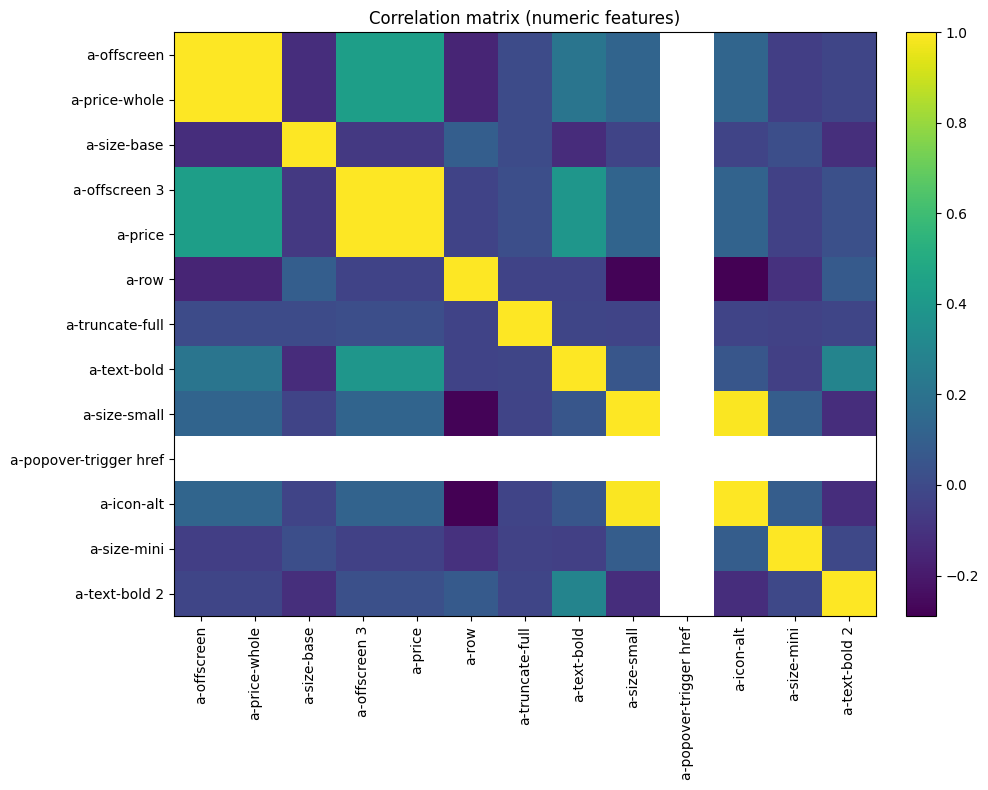

Top absolute correlations (abs value):


,,0
a-offscreen,a-price-whole,1.000000
a-price-whole,a-offscreen,1.000000
a-offscreen 3,a-price,0.998716
a-price,a-offscreen 3,0.998716
a-icon-alt,a-size-small,0.994363
a-size-small,a-icon-alt,0.994363
a-offscreen 3,a-price-whole,0.434038
a-price-whole,a-offscreen 3,0.434038
a-offscreen,a-offscreen 3,0.434038
a-offscreen 3,a-offscreen,0.434038


In [ ]:
# Cell 8: correlation matrix & heatmap
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) == 0:
    print("No numeric columns found after conversion — cannot plot correlation matrix.")
    print("Available columns:", df2.columns.tolist())
else:
    corr = df2[num_cols].corr()
    plt.figure(figsize=(10,8))
    im = plt.imshow(corr, interpolation='none', aspect='auto')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlation matrix (numeric features)")
    plt.tight_layout()
    plt.show()

    # Show top absolute correlations (not self)
    corr_unstack = corr.where(~np.eye(corr.shape[0],dtype=bool)).stack().abs().sort_values(ascending=False)
    print("Top absolute correlations (abs value):")
    display(corr_unstack.head(10))


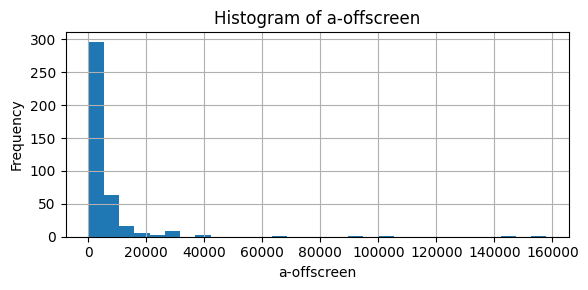

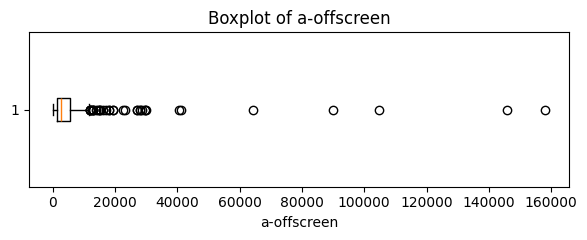

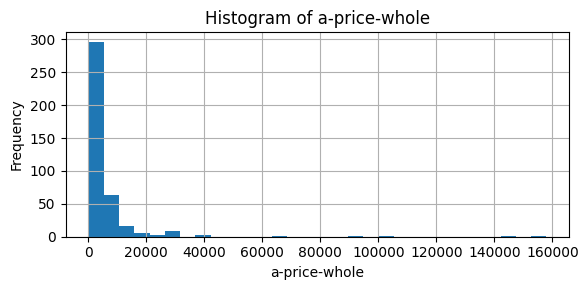

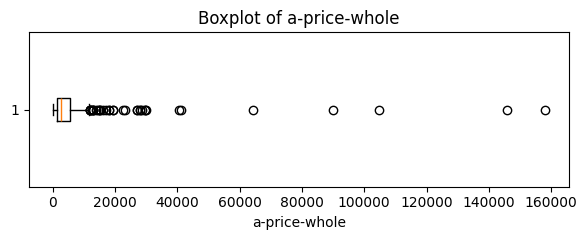

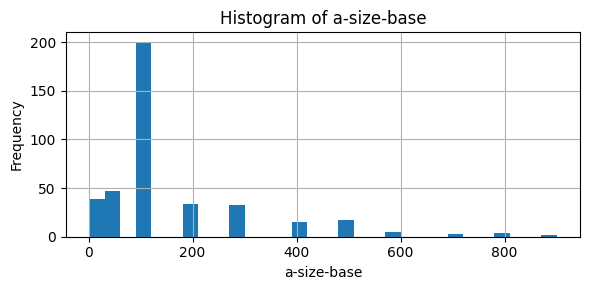

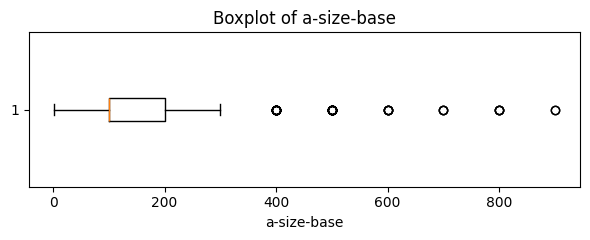

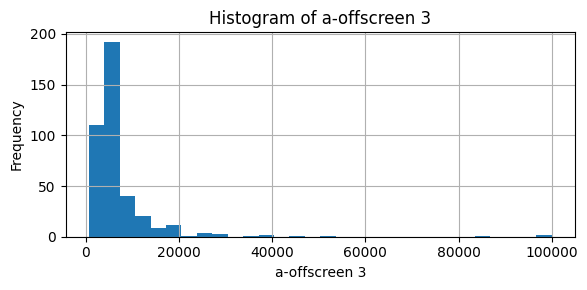

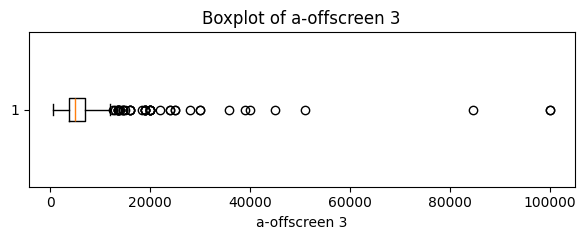

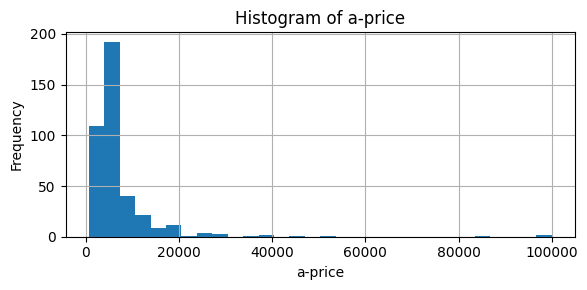

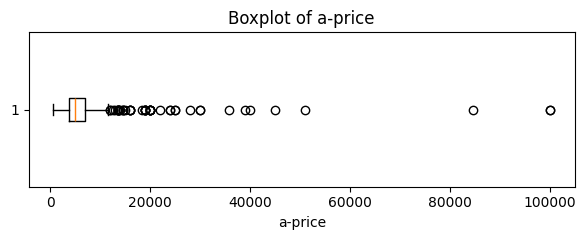

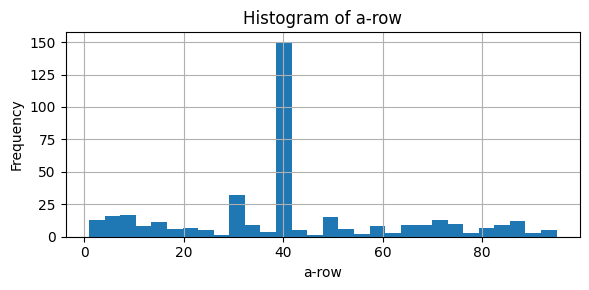

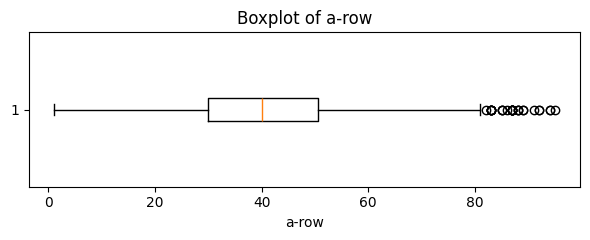

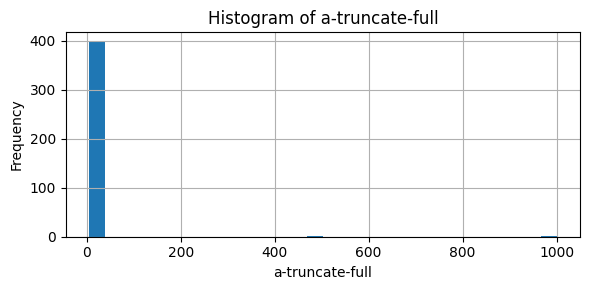

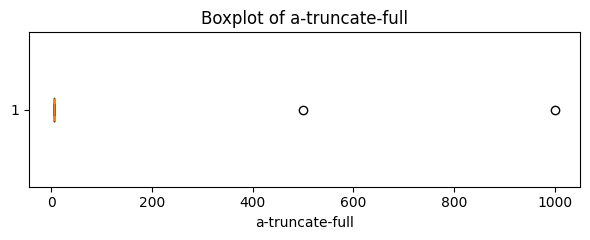

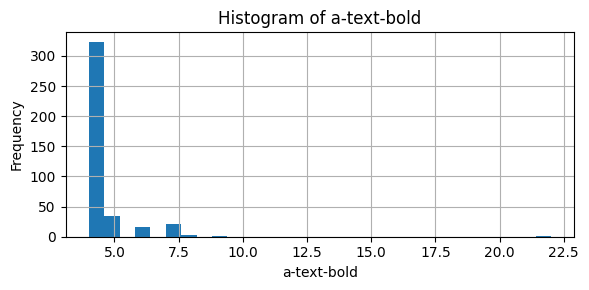

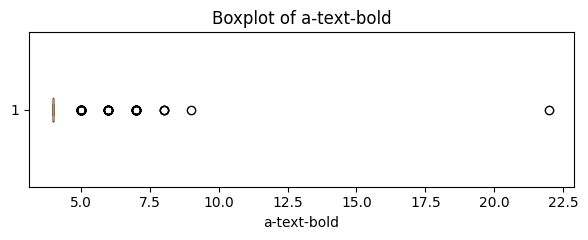

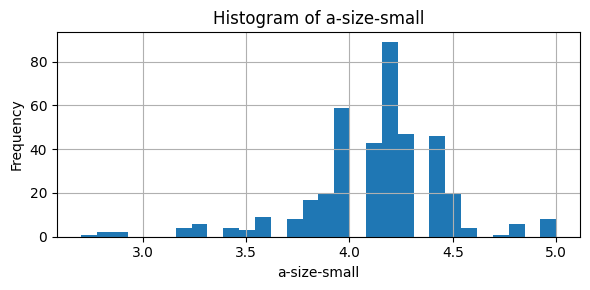

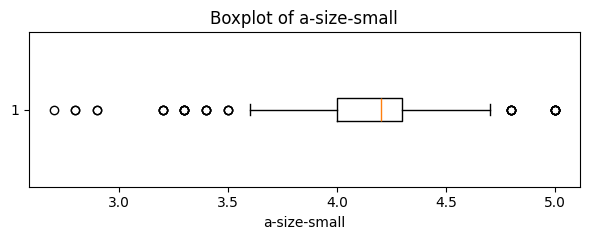

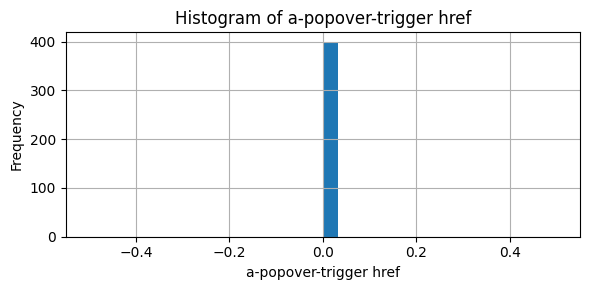

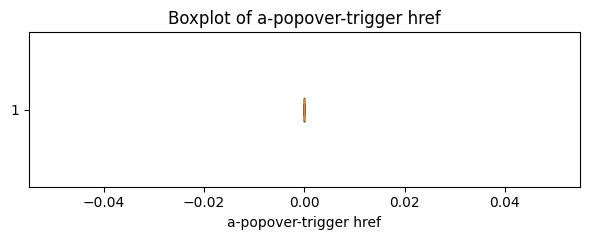

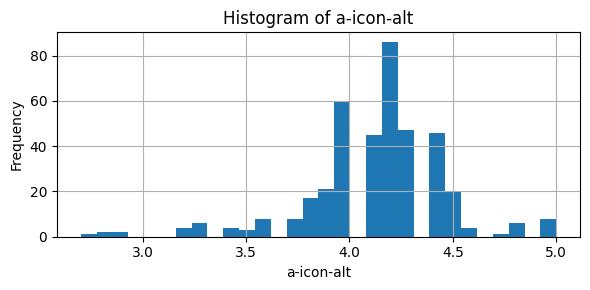

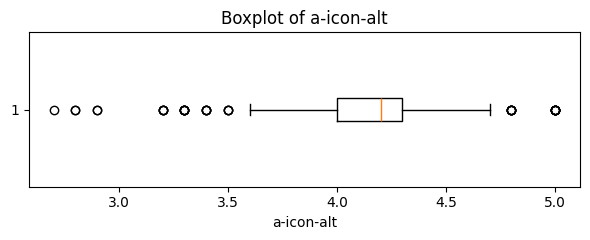

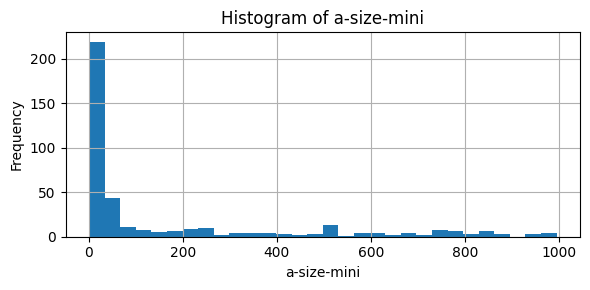

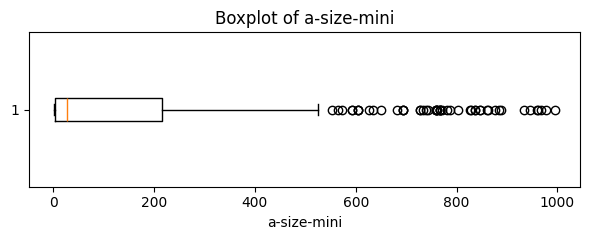

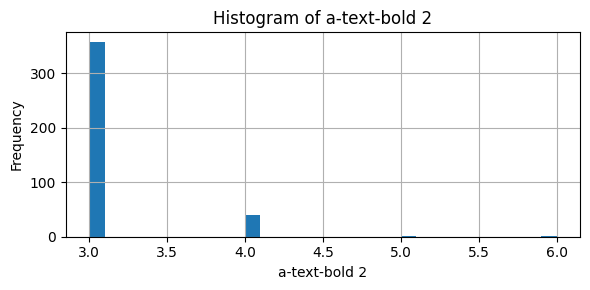

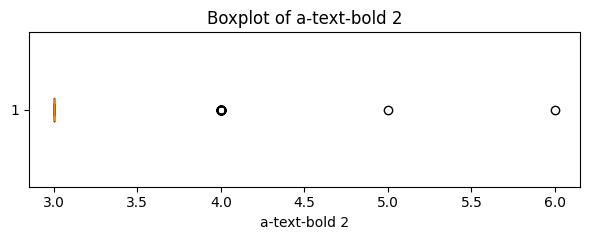

Categorical column chosen for bar chart: a-column | unique values: 2


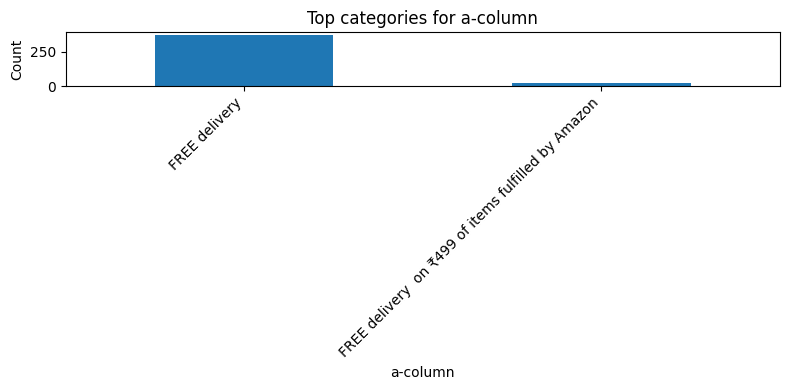

In [35]:
# Cell 9 (fixed): plots for each numeric column (histogram and boxplot)
import math

num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure(figsize=(6,3))
    df2[c].dropna().hist(bins=30)
    plt.title(f'Histogram of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,2.5))
    plt.boxplot(df2[c].dropna(), vert=False)
    plt.title(f'Boxplot of {c}')
    plt.xlabel(c)
    plt.tight_layout()
    plt.show()

# Categorical bar chart example: choose a categorical column automatically (prefer small-medium cardinality)
cat_cols = df2.select_dtypes(include=['object','category','string']).columns.tolist()
if cat_cols:
    chosen = None
    # prefer columns with unique values between 2 and 100 (not too small, not too large)
    candidates = sorted(cat_cols, key=lambda col: df2[col].nunique())
    for c in candidates:
        nunq = df2[c].nunique()
        if 2 <= nunq <= 100:   # choose a column with manageable number of categories
            chosen = c
            break
    # fallback: pick the categorical column with smallest cardinality
    if chosen is None:
        chosen = candidates[0]

    print("Categorical column chosen for bar chart:", chosen, "| unique values:", df2[chosen].nunique())
    top_counts = df2[chosen].value_counts().nlargest(12)
    plt.figure(figsize=(8,4))
    top_counts.plot(kind='bar')
    plt.title(f'Top categories for {chosen}')
    plt.xlabel(chosen)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for bar chart.")


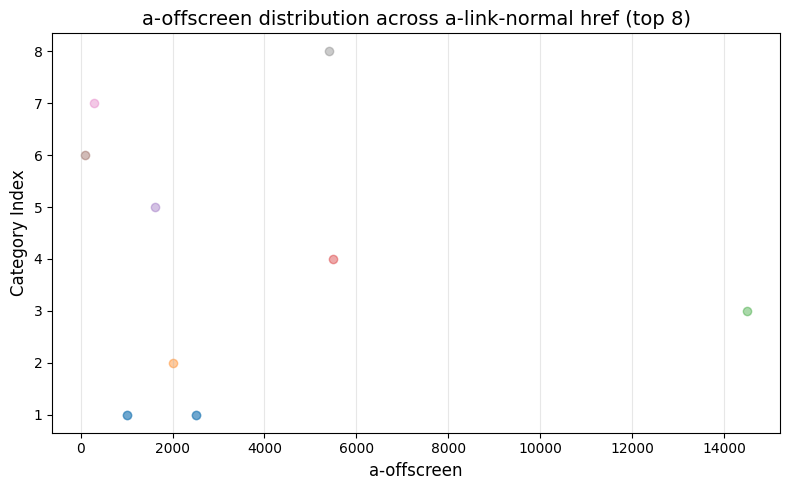

In [38]:
import numpy as np
import matplotlib.pyplot as plt

num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df2.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

if num_cols and cat_cols:
    num = num_cols[0]
    cat = cat_cols[0]

    # use top 8 most frequent categories
    top_cats = df2[cat].value_counts().index[:8]

    plt.figure(figsize=(8,5))
    for i, val in enumerate(top_cats, start=1):   # start index at 1
        y_vals = np.full(sum(df2[cat] == val), i)  # y position is numeric index
        x_vals = df2.loc[df2[cat] == val, num]
        plt.scatter(x_vals, y_vals, alpha=0.4)

    plt.title(f"{num} distribution across {cat} (top 8)", fontsize=14)
    plt.xlabel(num, fontsize=12)
    plt.ylabel("Category Index", fontsize=12)
    plt.yticks(range(1, len(top_cats)+1), range(1, len(top_cats)+1))  # 1,2,3,...
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Need at least one numeric and one categorical column.")


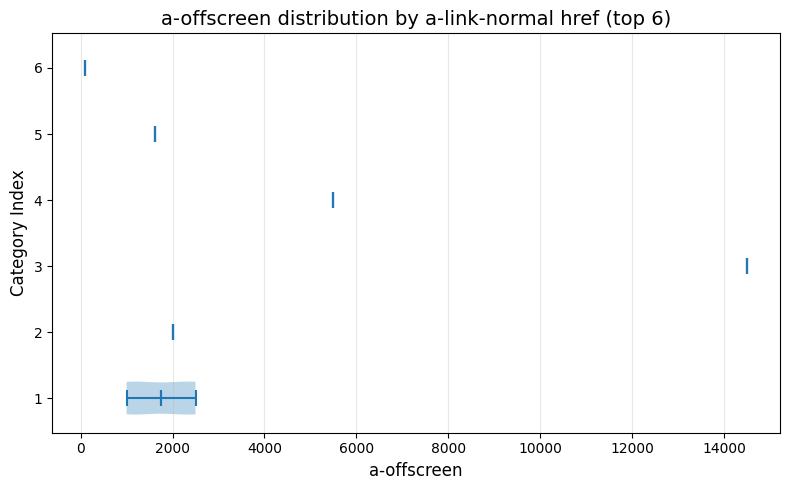

In [39]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df2.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

if num_cols and cat_cols:
    num = num_cols[0]
    cat = cat_cols[0]

    top_cats = df2[cat].value_counts().index[:6]
    groups = [df2.loc[df2[cat] == val, num].dropna() for val in top_cats]

    plt.figure(figsize=(8,5))
    parts = plt.violinplot(groups, vert=False, showmeans=True, showextrema=True, showmedians=True)

    plt.title(f"{num} distribution by {cat} (top 6)", fontsize=14)
    plt.xlabel(num, fontsize=12)
    plt.ylabel("Category Index", fontsize=12)
    # y positions are 1..N, labels also 1..N (no long text)
    plt.yticks(range(1, len(top_cats)+1), range(1, len(top_cats)+1))
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Need numeric + categorical columns.")


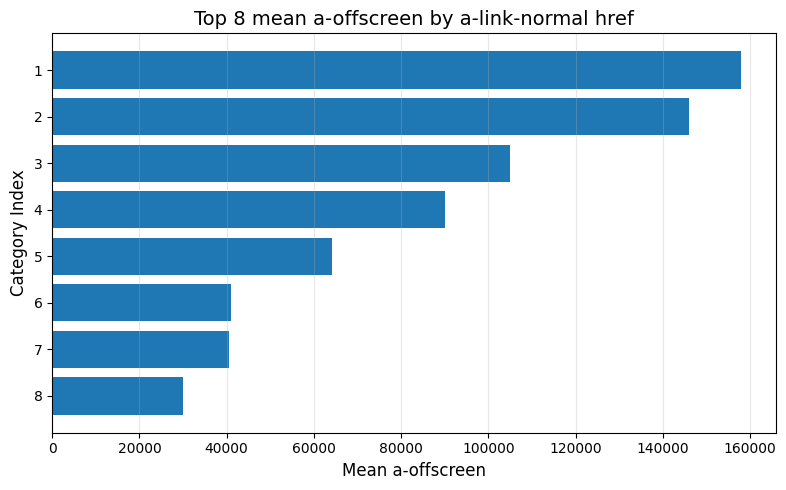

In [40]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df2.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

if num_cols and cat_cols:
    num = num_cols[0]
    cat = cat_cols[0]

    grouped = df2.groupby(cat)[num].mean().sort_values(ascending=False).head(8)

    # indices 1..N instead of labels
    indices = range(1, len(grouped)+1)

    plt.figure(figsize=(8,5))
    plt.barh(indices, grouped.values)
    plt.title(f"Top 8 mean {num} by {cat}", fontsize=14)
    plt.xlabel(f"Mean {num}", fontsize=12)
    plt.ylabel("Category Index", fontsize=12)
    plt.yticks(indices, indices)  # 1,2,3,...
    plt.gca().invert_yaxis()   # largest at top
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric/categorical columns for grouped bar.")


In [43]:
# Figure 1: Distribution of Watch Prices

import matplotlib.pyplot as plt

# Replace "Price" with your actual price column name
price_col = "Price"

plt.figure(figsize=(8,5))
plt.hist(df2[price_col], bins=30, edgecolor='black', alpha=0.7)

plt.title("Figure 1: Distribution of Watch Prices", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


KeyError: 'Price'

<Figure size 800x500 with 0 Axes>

In [44]:
print(df2.columns.tolist())


['a-link-normal href', 's-image src', 'a-link-normal href 2', 'a-size-base-plus', 'a-link-normal href 3', 'a-size-base-plus 2', 'aok-offscreen', 'a-link-normal href 4', 'a-offscreen', 'a-price-symbol', 'a-price-whole', 'a-offscreen 2', 'a-size-base', 'a-offscreen 3', 'a-price', 'a-row', 'a-truncate-full', 'a-truncate-cut', 'a-column', 'a-text-bold', 'a-button-text', 'a-size-small', 'a-popover-trigger href', 'a-icon-alt', 'a-size-mini', 'a-column 2', 'a-text-bold 2']


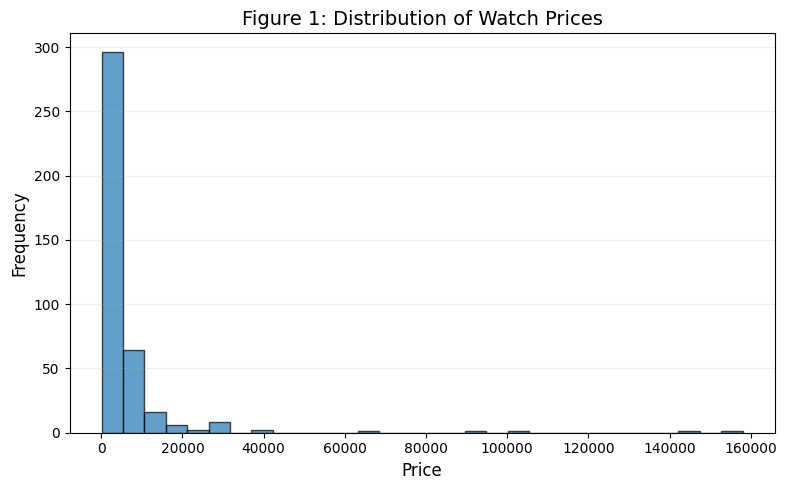

In [45]:
# Figure 1: Distribution of Watch Prices

import matplotlib.pyplot as plt

price_col = "a-price-whole"   # <-- your actual column name

plt.figure(figsize=(8,5))
plt.hist(df2[price_col], bins=30, edgecolor='black', alpha=0.7)

plt.title("Figure 1: Distribution of Watch Prices", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


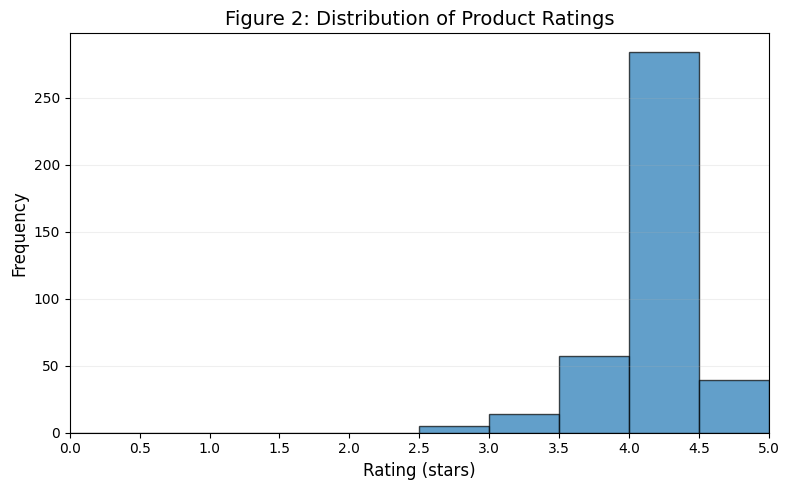

In [46]:
# Figure 2: Distribution of Product Ratings

import numpy as np
import matplotlib.pyplot as plt

# Source column containing rating text like "4.3 out of 5 stars"
rating_src_col = "a-icon-alt"

# Create a numeric rating column from the text
df2["rating_stars"] = (
    df2[rating_src_col]
      .astype(str)
      .str.extract(r"([\d\.]+)", expand=False)   # extract number like 4.3
      .astype(float)
)

plt.figure(figsize=(8,5))
plt.hist(
    df2["rating_stars"].dropna(),
    bins=np.arange(0, 5.5, 0.5),  # bins from 0 to 5 in 0.5 steps
    edgecolor="black",
    alpha=0.7
)

plt.title("Figure 2: Distribution of Product Ratings", fontsize=14)
plt.xlabel("Rating (stars)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlim(0, 5)

plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


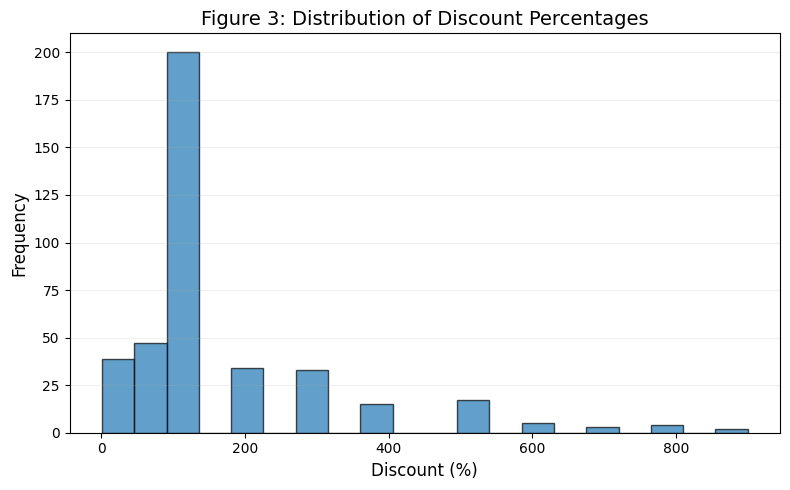

In [47]:
# Figure 3: Distribution of Discount Percentages

import matplotlib.pyplot as plt
import numpy as np

# Column likely containing discounts like "25% off"
discount_src = "a-size-base"   # <-- change here if discount is in another column

# Extract numeric percentage
df2["discount_percent"] = (
    df2[discount_src]
        .astype(str)
        .str.extract(r'(\d+)', expand=False)   # get digits before %
        .astype(float)
)

# Drop missing / invalid values
discount_data = df2["discount_percent"].dropna()

plt.figure(figsize=(8,5))
plt.hist(discount_data, bins=20, edgecolor="black", alpha=0.7)

plt.title("Figure 3: Distribution of Discount Percentages", fontsize=14)
plt.xlabel("Discount (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", alpha=0.2)

plt.tight_layout()
plt.show()


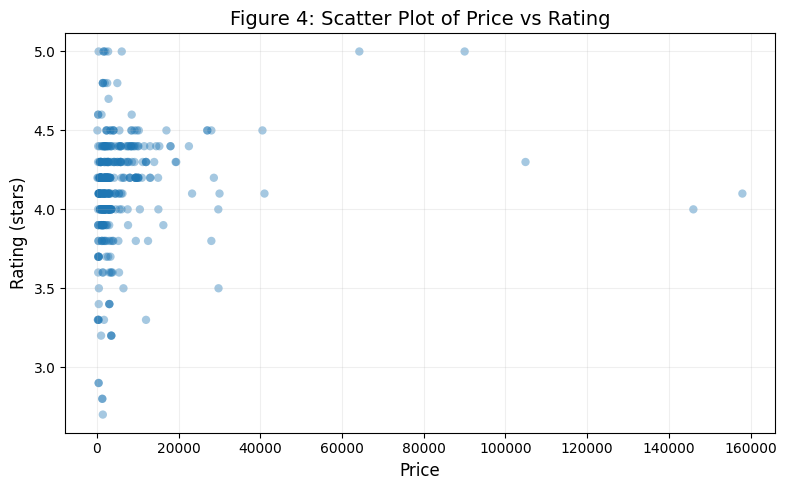

In [48]:
# Figure 4: Scatter Plot of Price vs Rating

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- PRICE COLUMN ---
price_col = "a-price-whole"
df2[price_col] = pd.to_numeric(df2[price_col], errors="coerce")

# --- RATING COLUMN ---
rating_src_col = "a-icon-alt"

# Extract numeric rating from text like "4.3 out of 5 stars"
df2["rating_stars"] = (
    df2[rating_src_col]
      .astype(str)
      .str.extract(r"([\d\.]+)", expand=False)
      .astype(float)
)

# Filter valid data
valid = df2[[price_col, "rating_stars"]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(valid[price_col], valid["rating_stars"], alpha=0.4, edgecolors='none')

plt.title("Figure 4: Scatter Plot of Price vs Rating", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Rating (stars)", fontsize=12)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


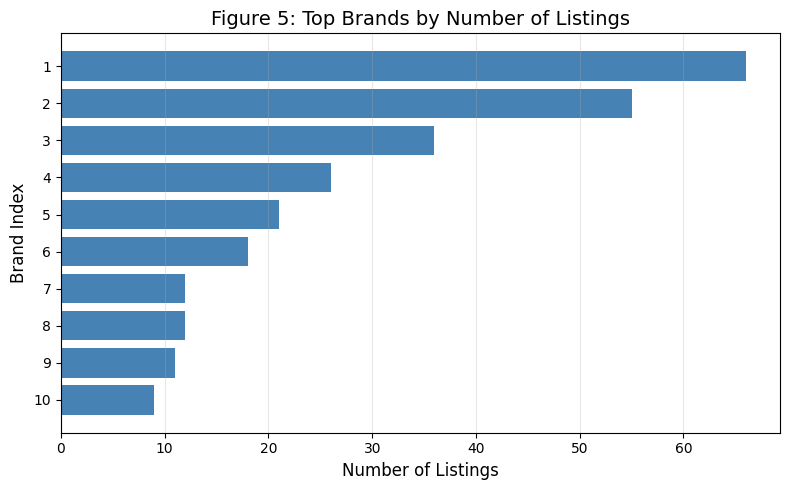

In [49]:
# Figure 5: Top Brands by Number of Listings

import matplotlib.pyplot as plt

# choose brand column (change if needed)
brand_col = "a-size-base-plus"

# count brands
brand_counts = df2[brand_col].value_counts().head(10)

# numeric index for clean plotting
indices = range(1, len(brand_counts) + 1)

plt.figure(figsize=(8,5))
plt.barh(indices, brand_counts.values, color='steelblue')

plt.title("Figure 5: Top Brands by Number of Listings", fontsize=14)
plt.xlabel("Number of Listings", fontsize=12)
plt.ylabel("Brand Index", fontsize=12)

plt.yticks(indices, indices)  # clean numeric labels
plt.gca().invert_yaxis()  # biggest brand at top
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [51]:
# PRICE
df2["a-price-whole"] = pd.to_numeric(df2["a-price-whole"], errors="coerce")

# RATING
df2["rating_stars"] = (
    df2["a-icon-alt"]
      .astype(str)
      .str.extract(r"([\d\.]+)", expand=False)
      .astype(float)
)

# DISCOUNT PERCENT
df2["discount_percent"] = (
    df2["a-size-base"]
      .astype(str)
      .str.extract(r"(\d+)", expand=False)
      .astype(float)
)

# RATING COUNT (extract digits)
df2["rating_count"] = (
    df2["a-size-mini"]
      .astype(str)
      .str.extract(r"(\d+)", expand=False)
      .astype(float)
)

# BRAND column
brand_col = "a-size-base-plus"


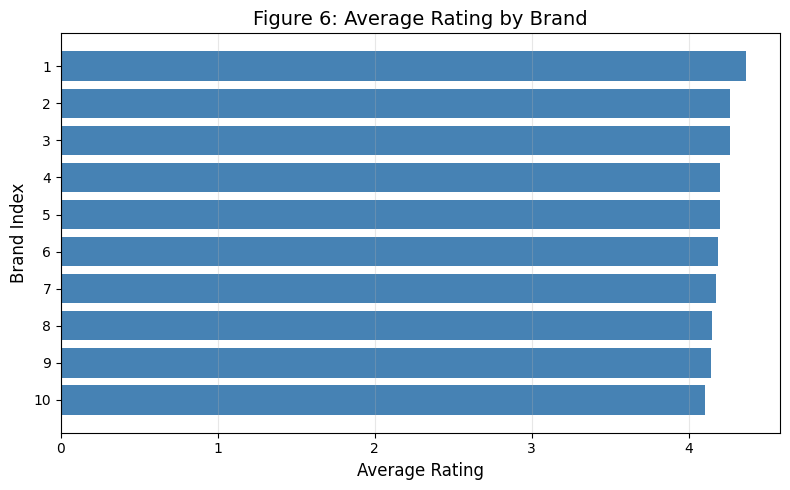

In [52]:
# Figure 6: Average Rating by Brand

import matplotlib.pyplot as plt

brand_groups = df2.groupby(brand_col)["rating_stars"].agg(["count", "mean"])
brand_filtered = brand_groups[brand_groups["count"] >= 5].sort_values("mean", ascending=False).head(10)

indices = range(1, len(brand_filtered) + 1)

plt.figure(figsize=(8,5))
plt.barh(indices, brand_filtered["mean"], color="steelblue")

plt.title("Figure 6: Average Rating by Brand", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Brand Index", fontsize=12)
plt.yticks(indices, indices)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4195187032.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([plot_df[plot_df[category_col] == c]["a-price-whole"].dropna()


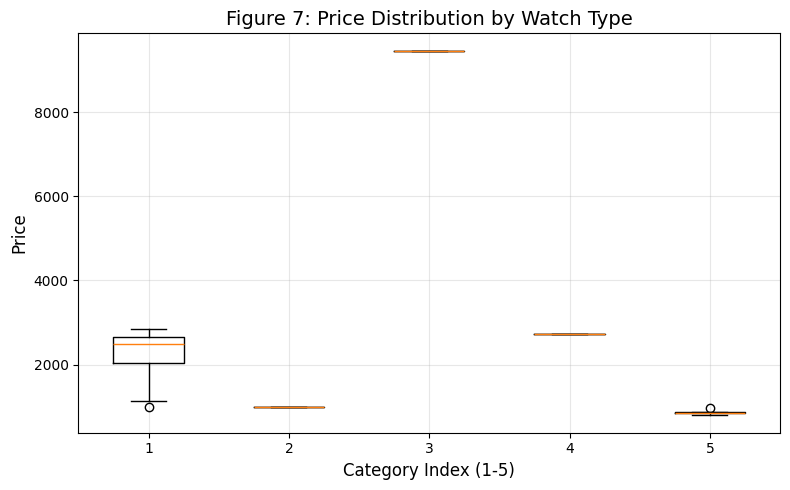

Category Index Mapping:
1 → Classics Analog Watch for Men with Round Dial & Water Resistant Man's Wrist Watches
2 → Digital Sports Watch, Dual Time, Alarm, Calendar, Stopwatch, Water-Resistant, Shock-Resistant, Back Light Display. The Perfect Watch for Men - CT 2106
3 → Analog Black Dial Men's Watch-U1362G3M
4 → Men's Watch Quartz Analog Waterproof Multifunction Chronograph Sports Watch for Men with Calendar Black Rubber Strap
5 → Analog Unisex-Adult Watch


In [53]:
# Figure 7: Price Distribution by Watch Type / Category

category_col = "a-size-base-plus 2"   # change if needed

top_types = df2[category_col].value_counts().head(5).index
plot_df = df2[df2[category_col].isin(top_types)]

plt.figure(figsize=(8,5))
plt.boxplot([plot_df[plot_df[category_col] == c]["a-price-whole"].dropna()
             for c in top_types],
            labels=[1,2,3,4,5])

plt.title("Figure 7: Price Distribution by Watch Type", fontsize=14)
plt.xlabel("Category Index (1-5)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Category Index Mapping:")
for i, c in enumerate(top_types, start=1):
    print(i, "→", c)


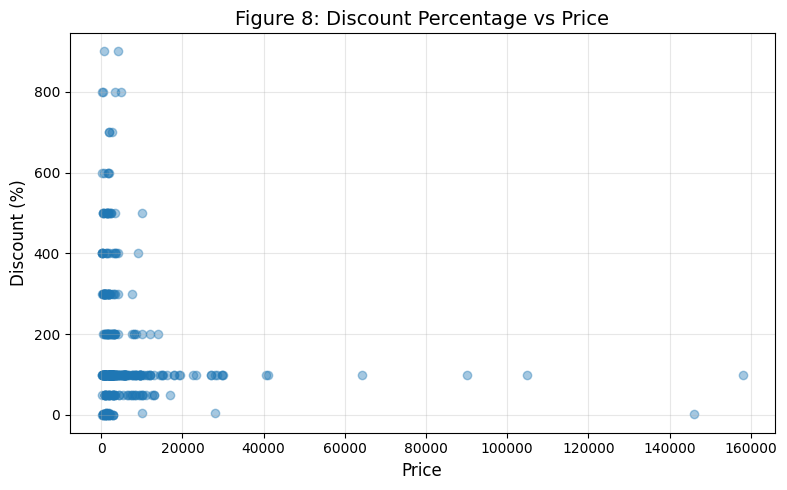

In [54]:
# Figure 8: Discount Percentage vs Price

valid = df2[["discount_percent", "a-price-whole"]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(valid["a-price-whole"], valid["discount_percent"], alpha=0.4)

plt.title("Figure 8: Discount Percentage vs Price", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Discount (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


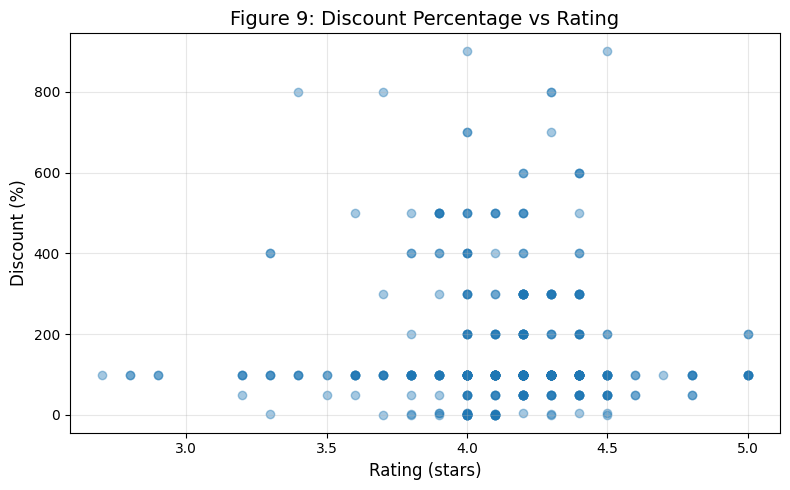

In [55]:
# Figure 9: Discount Percentage vs Rating

valid = df2[["discount_percent", "rating_stars"]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(valid["rating_stars"], valid["discount_percent"], alpha=0.4)

plt.title("Figure 9: Discount Percentage vs Rating", fontsize=14)
plt.xlabel("Rating (stars)", fontsize=12)
plt.ylabel("Discount (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2327159965.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_df = df2.groupby("price_segment")["discount_percent"].mean()


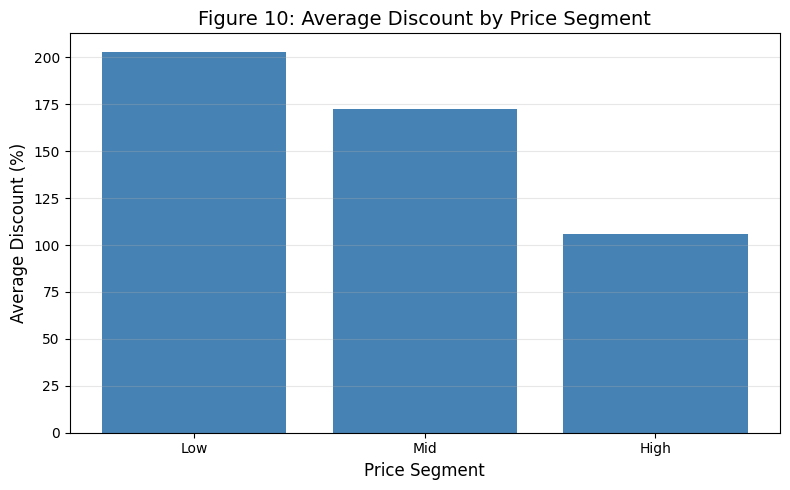

In [56]:
# Figure 10: Average Discount by Price Segment

# Define segments
df2["price_segment"] = pd.cut(
    df2["a-price-whole"],
    bins=[0, 1000, 5000, 20000],
    labels=["Low", "Mid", "High"]
)

segment_df = df2.groupby("price_segment")["discount_percent"].mean()

plt.figure(figsize=(8,5))
plt.bar(segment_df.index.astype(str), segment_df.values, color='steelblue')

plt.title("Figure 10: Average Discount by Price Segment", fontsize=14)
plt.xlabel("Price Segment", fontsize=12)
plt.ylabel("Average Discount (%)", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


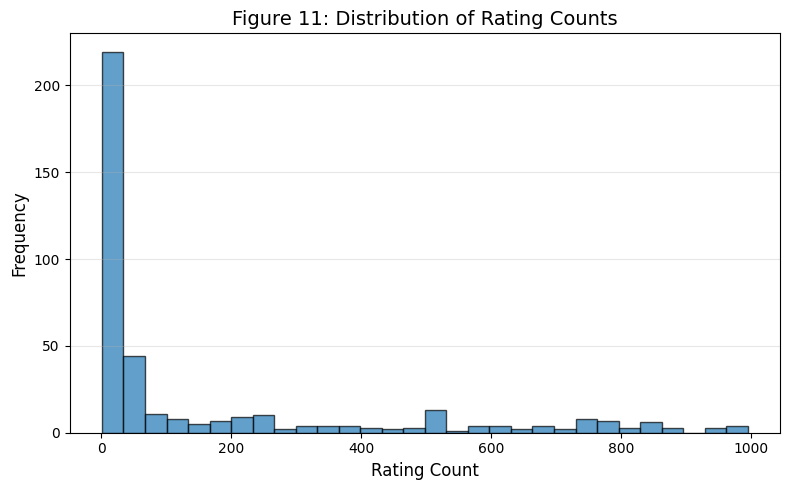

In [57]:
# Figure 11: Distribution of Rating Counts

rating_counts = df2["rating_count"].dropna()

plt.figure(figsize=(8,5))
plt.hist(rating_counts, bins=30, edgecolor='black', alpha=0.7)

plt.title("Figure 11: Distribution of Rating Counts", fontsize=14)
plt.xlabel("Rating Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


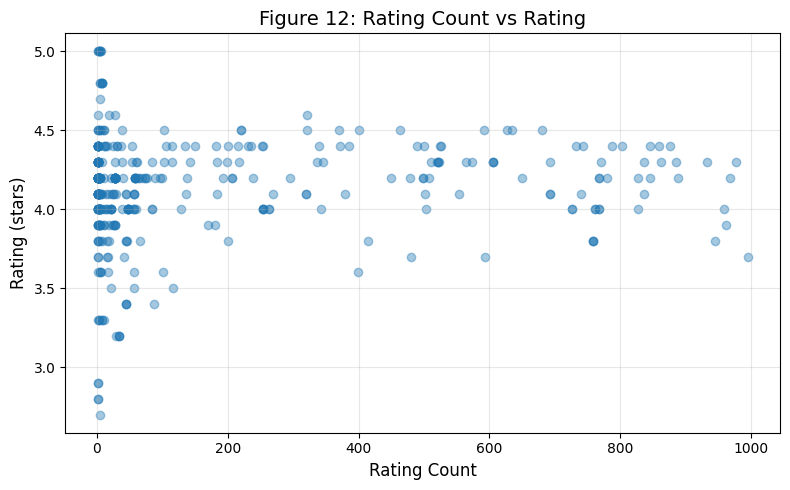

In [58]:
# Figure 12: Rating Count vs Rating

valid = df2[["rating_count", "rating_stars"]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(valid["rating_count"], valid["rating_stars"], alpha=0.4)

plt.title("Figure 12: Rating Count vs Rating", fontsize=14)
plt.xlabel("Rating Count", fontsize=12)
plt.ylabel("Rating (stars)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


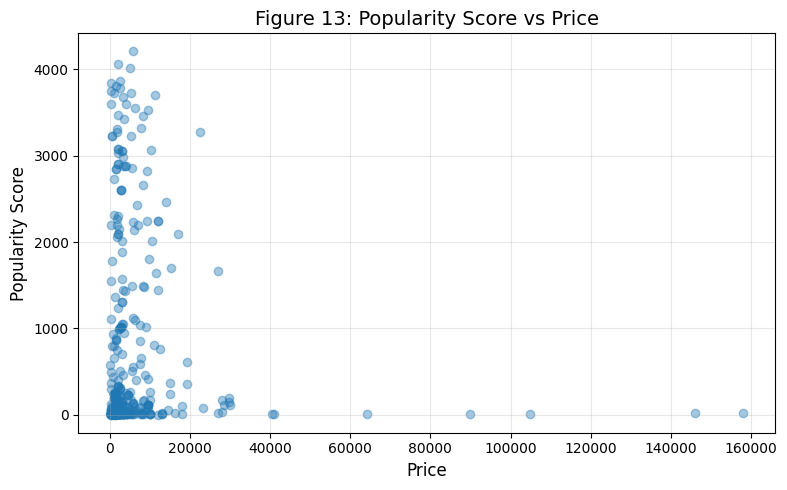

In [59]:
# Figure 13: Popularity Score vs Price

df2["popularity_score"] = df2["rating_stars"] * df2["rating_count"]

valid = df2[["popularity_score", "a-price-whole"]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(valid["a-price-whole"], valid["popularity_score"], alpha=0.4)

plt.title("Figure 13: Popularity Score vs Price", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


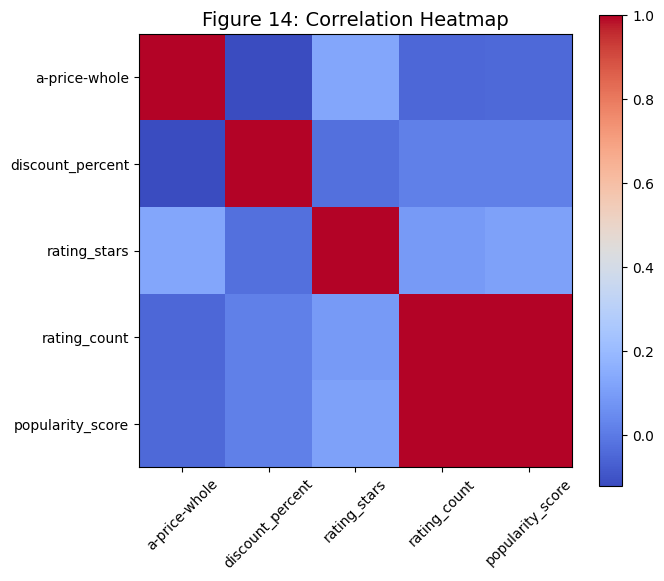

In [60]:
# Figure 14: Correlation Heatmap

num_cols = ["a-price-whole", "discount_percent", "rating_stars",
            "rating_count", "popularity_score"]

corr = df2[num_cols].corr()

plt.figure(figsize=(7,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()

plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)

plt.title("Figure 14: Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


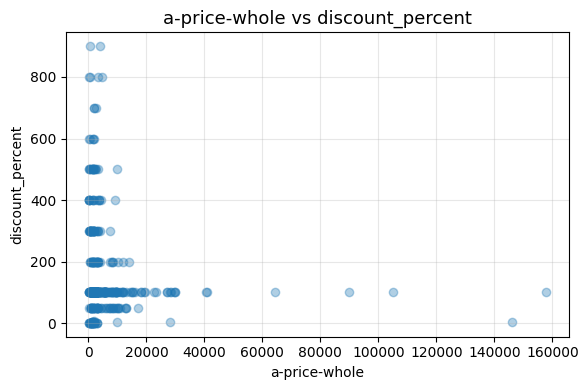

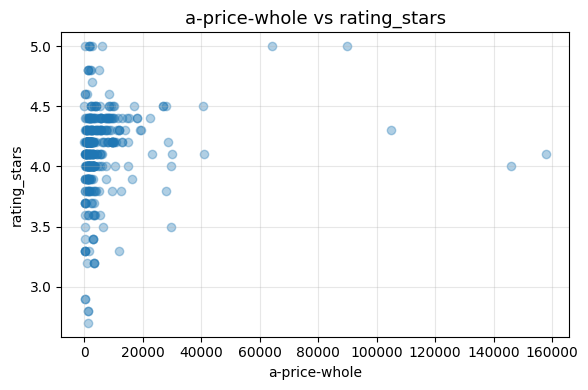

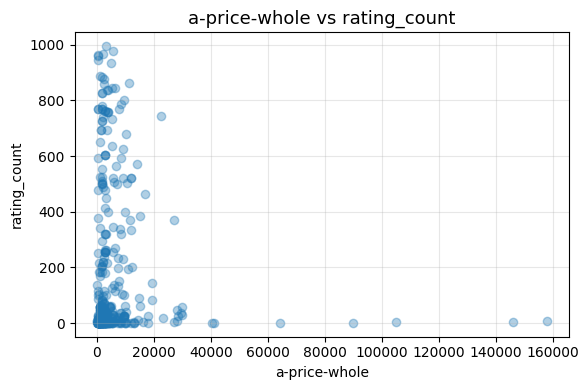

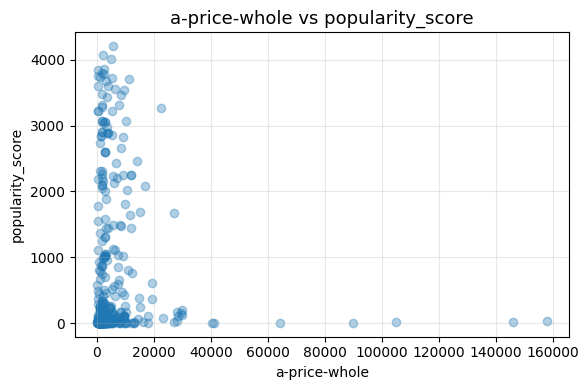

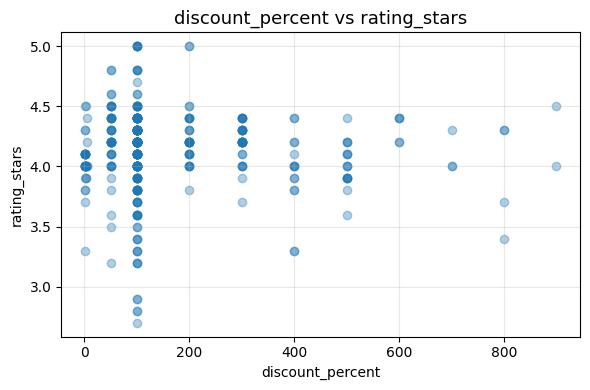

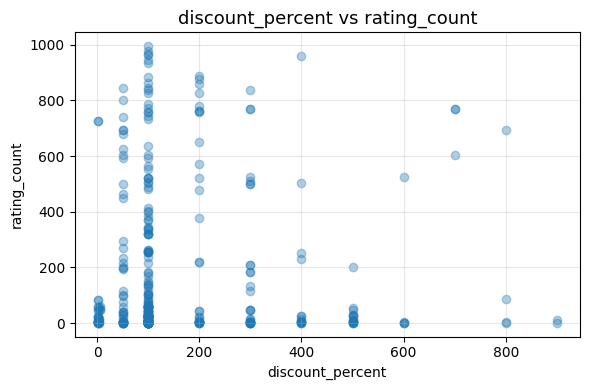

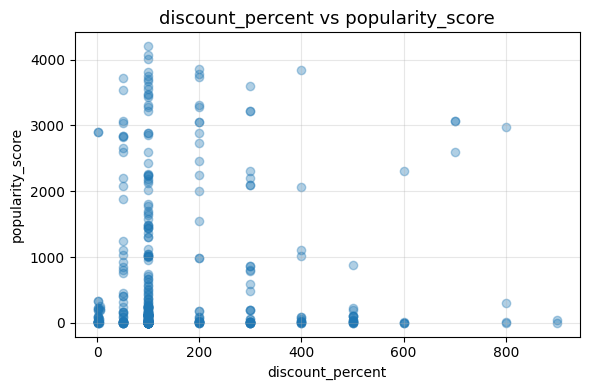

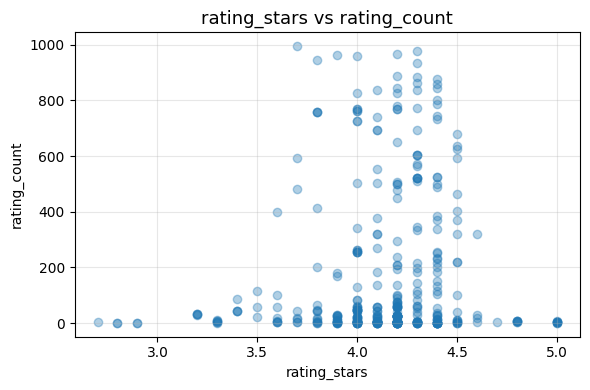

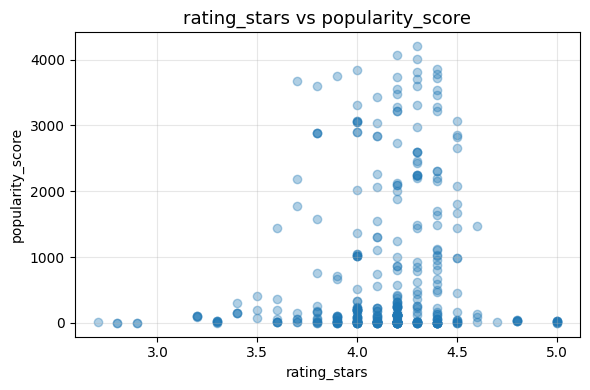

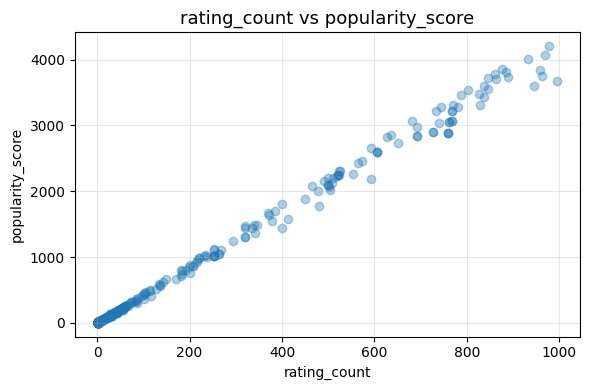

In [61]:
# Figure 15: Pairplot of Selected Numeric Features

num_cols = ["a-price-whole", "discount_percent", "rating_stars",
            "rating_count", "popularity_score"]

import itertools
for x, y in itertools.combinations(num_cols, 2):
    plt.figure(figsize=(6,4))
    plt.scatter(df2[x], df2[y], alpha=0.35)
    plt.title(f"{x} vs {y}", fontsize=13)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


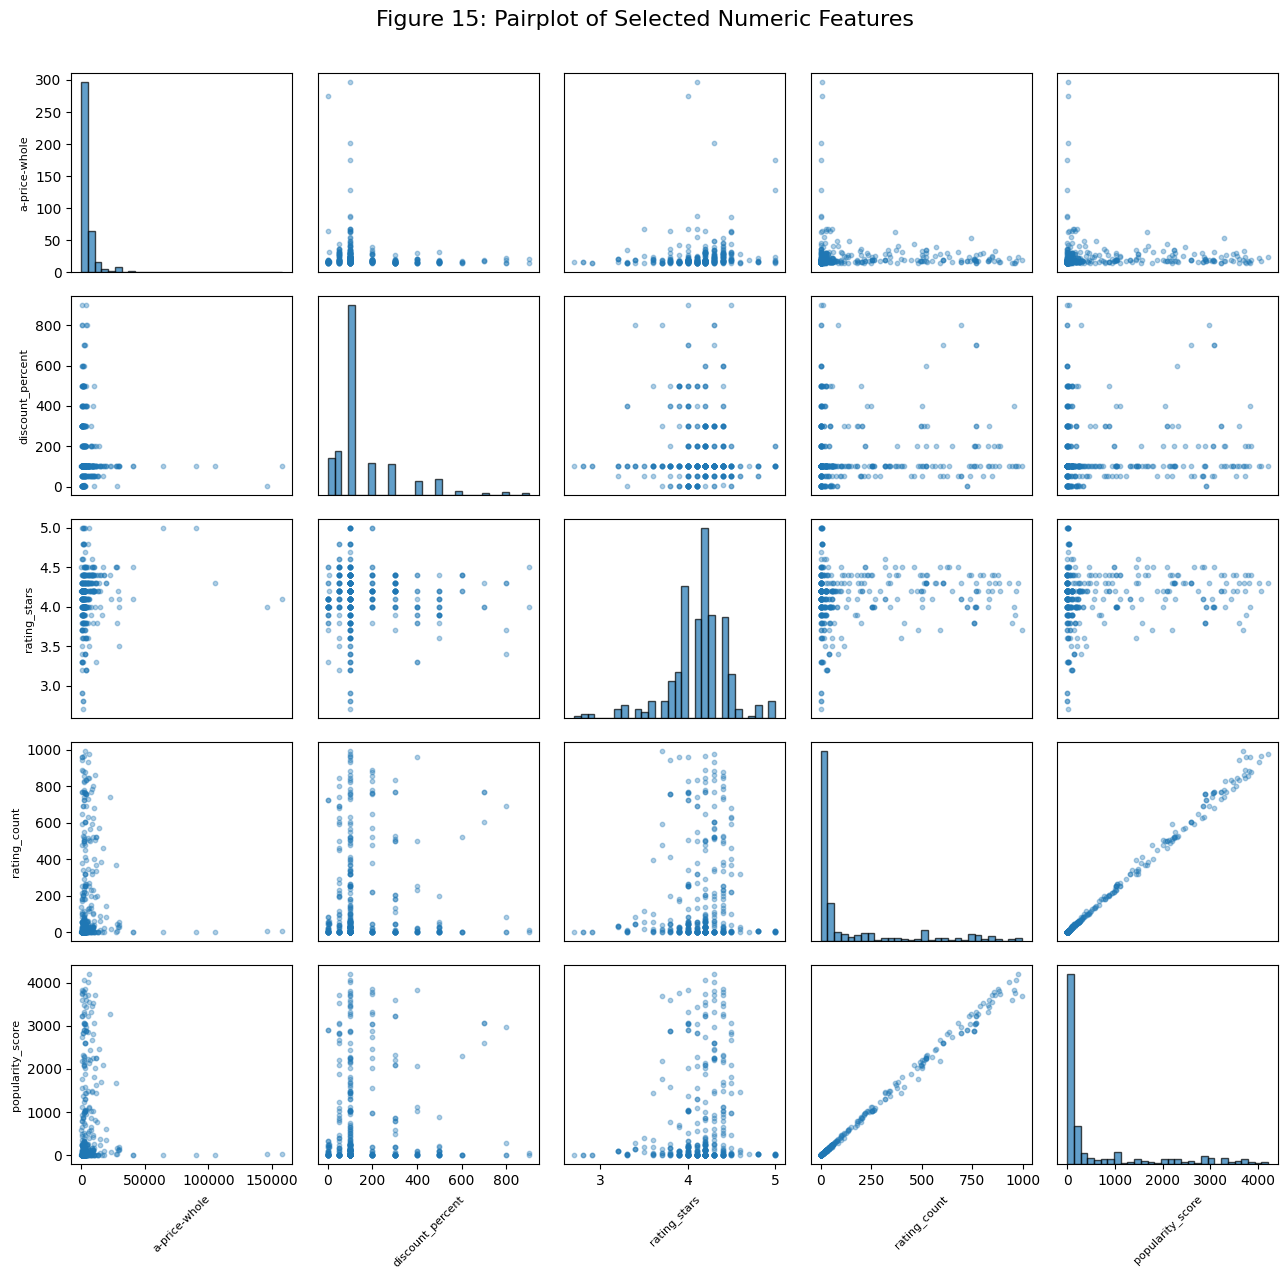

In [62]:
# Figure 15: Pairplot of Selected Numeric Features (Matplotlib Only)

import matplotlib.pyplot as plt
import pandas as pd
import itertools

# SELECT NUMERIC COLUMNS
num_cols = [
    "a-price-whole",
    "discount_percent",
    "rating_stars",
    "rating_count",
    "popularity_score"
]

# DROP rows with missing values for any of these columns
plot_df = df2[num_cols].dropna()

# SCATTER-PLOT GRID (PAIRPLOT)
fig, axes = plt.subplots(len(num_cols), len(num_cols), figsize=(13, 13))

for i, col1 in enumerate(num_cols):
    for j, col2 in enumerate(num_cols):

        ax = axes[i, j]

        if i == j:
            # Diagonal: histogram
            ax.hist(plot_df[col1], bins=30, edgecolor='black', alpha=0.7)
        else:
            # Off-diagonal: scatter plot
            ax.scatter(plot_df[col2], plot_df[col1], alpha=0.35, s=10)

        # Axis labeling
        if i == len(num_cols) - 1:
            ax.set_xlabel(col2, fontsize=8, rotation=45)
        else:
            ax.set_xticks([])

        if j == 0:
            ax.set_ylabel(col1, fontsize=8)
        else:
            ax.set_yticks([])

plt.suptitle("Figure 15: Pairplot of Selected Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
